# EXOPLANETS II: Habitable zone around a star

The habitable zone of a star is defined as the region around the star in which a planet has the right temperature for maintain liquid water. We currently think that water is necessary for the development of life.

Water is in liquid form at temperatures between 0 and 100 degrees Celcius or equivalently between 273K and 473K (degrees Kelvin).

The equilibrium temperature of tha planet is determined by considering the energy balance between the stellar radiation absorbed by the planet and the radiation emitted by the planet. 

If  $L_\star$ is the luminosity of a star (energy emitted per unit time), then the flux (energy per unit time and unit area) that arrives at the planet is
### $F=\frac{L_\star}{4\pi a^2}$.

Only one side of the planet is facing the star, so the projected area that abdsorbes radiation is: $\pi R_p^2$, where $R_p$ is the radius of the planet.

The albedo $A$ of a planet determined waht fraction of the incident radiation is reflected $A=1$ means all the incident radiation is reflected, whereas $A=0.7$ means that 30% of the incident radiation is absorbed. Then the absorded energy per unit time from the planet is 

### $L_{\rm abs}= \pi R_p^2 (1-A)\frac{L_\star}{4\pi a^2}$

The energy emitted per unit time from the planet is given by the  Stefan-Boltzmann law:

### $L_{\rm em}=4\pi R_p^2 \sigma T_p^4$, 

where $\sigma$ is the  Stefan-Boltzmann constant.

At *thermal equilbrium* absorbed and emitted must be the same, so the equilibrium temperature of a planet is

### $T_p=\left[\frac{(1-A) L_\star}{16\pi\sigma a^2}\right]^{1/4}$

Solving the above for $a$ we can find the distance from the star where the planet has a specific temperature $T_p$:

### $a=\left[\frac{(1-A) L_\star}{16\pi\sigma}\right]^{1/2} T_p^{-2}$.

From this equation we can then calculate the inner boundary $a_{\rm inner}$ and outer boundary $a_{\rm outer}$ of the habitable zone, i.e. the distance from the star where the planet temperature is between 273 and 373K. Note that $L_\star$ needs to be put in SI units in this equation and it will return the distance in m (again SI units).

## Task IIa

Make a graph with the mass of the star $M_\star$ (in solar masses) versus  $a_{\rm inner}$ and $a_{\rm outer}$ (in AU) that shows the boundaries (inner and outer) of the habitable zone around stars with masses from 0.1 to 2 times the mass of the Sun. 

Hint: Define a function that returns the distance of  planet from a star that a planet has a specific tempature (for a given stellar mass and albedo), i.e. boundary(mstar, albedo, temp). Then $a_{\rm inner}$ is the distance where the temperature is set to 273K, whereas $a_{\rm outer}$ is the distance where the planet temperature is set to 373K.  Assume that the albedo of the planet is $A=0.36$ (this is Earth's albedo).

You will also need to use the fact that the luminosity $L$ of the star is connected to its mass with the so called *mass-luminosity relation*:

### $L=M^3$

where the luminosity of the star needs to be in Solar luminosities and the mass of the star in Solar masses.

###Constants

$L_\odot=3.84\times 10^{26}\ {\rm W}$ (SI units)

$\sigma=5.67 \times 10^{-8}\ {\rm W m^{-2} ~K^{-4}}$ (SI units)

$1AU=1.496\times 10^{11} {\rm m}$ (SI units)

Don't forget to label your axes, put title, and legends for the different lines plotted.

After you make the graph plot the Earth on it. What do you observe? How can you explain this?


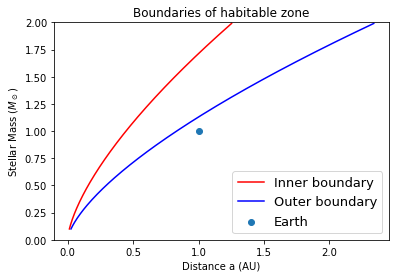

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def boundary(mstar, albedo, temp):
    "Calculate distance (in AU) for a given temperature"

    #define constants to be used
    sigma=5.67e-8
    Lsun=3.84e26
    au=1.496e11    

    #calculate the luminosity of the star and convert to SI units
    Lstar=mstar**3*Lsun
    #calculate distance
    a=np.sqrt(Lstar*(1.-albedo)/(16*np.pi*sigma))*np.power(temp,-2)
    #convert distance to AU
    a=a/au
    return a
    
# assume a value for the albedo
albedo=0.36

#create a range of stellar masses 
mstar=np.arange(0.1,2,0.01)

#calcuate inner and outer boundary using the function defined previoulsy
a_inner=boundary(mstar, albedo, 373.)
a_outer=boundary(mstar, albedo, 273.)

# make the plot
#set axis labels
plt.xlabel('Distance a (AU)')
plt.ylabel('Stellar Mass ($M_\odot$)')

#set axes limits
#plt.xlim (0.01, 3)
plt.ylim (0, 2)

#graph title
plt.title('Boundaries of habitable zone')

#plot inner boundary
plt.plot(a_inner, mstar, color='red', label="Inner boundary")
#plot outer boundary
plt.plot(a_outer, mstar, color='blue', label="Outer boundary")
#plot Earth
plt.scatter(1,1,label='Earth')
plt.legend(loc="lower right",fontsize=13)

plt.show()

We see that the Earth is outside the habitable zone of the Sun, which is of course not true! This is due to the *greenhouse effect* of the atmosphere. The radiation from the Sun can penetrate the atmosphere and reach  the surface of the Earth but the radiation that Earth emits has longer wavenlenght and is being absorved by the atmosphere raising the  temperature by about 30K. This brings the Earth within the habitable zone of the Sun. 

## Task IIb (optional)

Modify the above programme to plot the habitable zone boundaries while taking into account that the mass-luminosity relation is different for different stellar masses:
### $L=M^{2.5}$, for $Μ_\star<1{\rm M}_\odot$
### $L=M^{4.5}$, for $Μ_\star>1 {\rm M}_\odot$



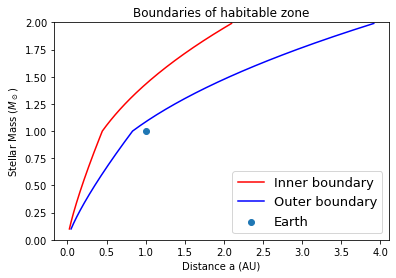

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def luminosity(mstar):
    "Calculate luminosity of star (SI units)"
    Lsun=3.84e26
    if mstar<1:
         Lstar=mstar**2.5*Lsun
    else:
        Lstar=mstar**4.5*Lsun
    return (Lstar)

def boundary(mstar, albedo, temp):
    "Calculate distance (in AU) for a given temperature"

    #define constants to be used
    sigma=5.67e-8
    Lsun=3.84e26
    au=1.496e11    

    #calculate the luminosity of the star and convert to SI units
    Lstar=luminosity(mstar)
    #calculate distance
    a=np.sqrt(Lstar*(1.-albedo)/(16*np.pi*sigma))*np.power(temp,-2)
    #convert distance to AU
    a=a/au
    return a
    
# assume a value for the albedo
albedo=0.36

#create a range of stellar masses 
mstar=np.arange(0.1,2,0.01)

#calcuate inner and outer boundary using the function defined previoulsy
for i in range(0,len(mstar)):
    a_inner[i]=boundary(mstar[i], albedo, 373.)
    a_outer[i]=boundary(mstar[i], albedo, 273.)

# make the plot
#set axis labels
plt.xlabel('Distance a (AU)')
plt.ylabel('Stellar Mass ($M_\odot$)')

#set axes limits
#plt.xlim (0.01, 3)
plt.ylim (0, 2)

#graph title
plt.title('Boundaries of habitable zone')

#plot inner boundary
plt.plot(a_inner, mstar, color='red', label="Inner boundary")
#plot outer boundary
plt.plot(a_outer, mstar, color='blue', label="Outer boundary")
#plot Earth
plt.scatter(1,1,label='Earth')
plt.legend(loc="lower right",fontsize=13)

plt.show()
